1. 판다스 데이터 불러오기(또는 numpy)
2. 데이터 전처리
3. 신경망 구축

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('test.csv', thousands = ',') 
# thousands 천단위 자리수 구분 , 없앰

# X = np.load('snake_x.npy')
# Y = np.load('snake_y.npy') # numpy로 받지만 상하좌우 하나일 텐데?

In [174]:

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import plot_model, to_categorical

In [147]:
x = df.iloc[:,0:400]    # iloc 는 숫자 통해 400번까지 슬라이싱, 20x20 데이터를 x로 
y = df['ans']           # ans는 y, 상 0 하 1 좌 2 우 3
x_train = x[:11000]      # 초기값 :200 / 0:200 / 200:400 / 200:400 
y_train = y[0:11000]
x_test =x[11000:12000]
y_test =y[11000:12000]

In [148]:
print(x_test.shape)
print(y_test.shape)
print(x_train.shape)
print(y_train.shape)

(1000, 400)
(1000,)
(11000, 400)
(11000,)


In [149]:
print(x_test.iloc[0])   # x_test 형식 확인

px1      3
px2      3
px3      3
px4      3
px5      3
        ..
px396    3
px397    3
px398    3
px399    3
px400    3
Name: 11000, Length: 400, dtype: int64


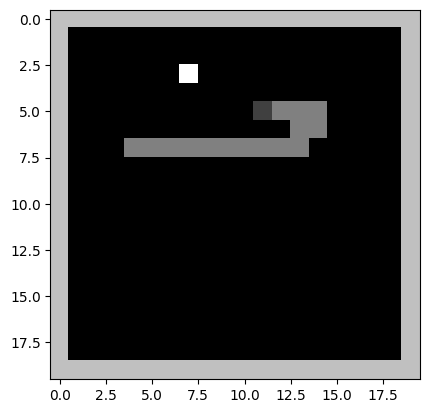

In [150]:
x1 = x_test.iloc[0].values # pandas를 numpy로 변형
x1 = x1.reshape(20,20)
plt.imshow(x1, cmap='gray')

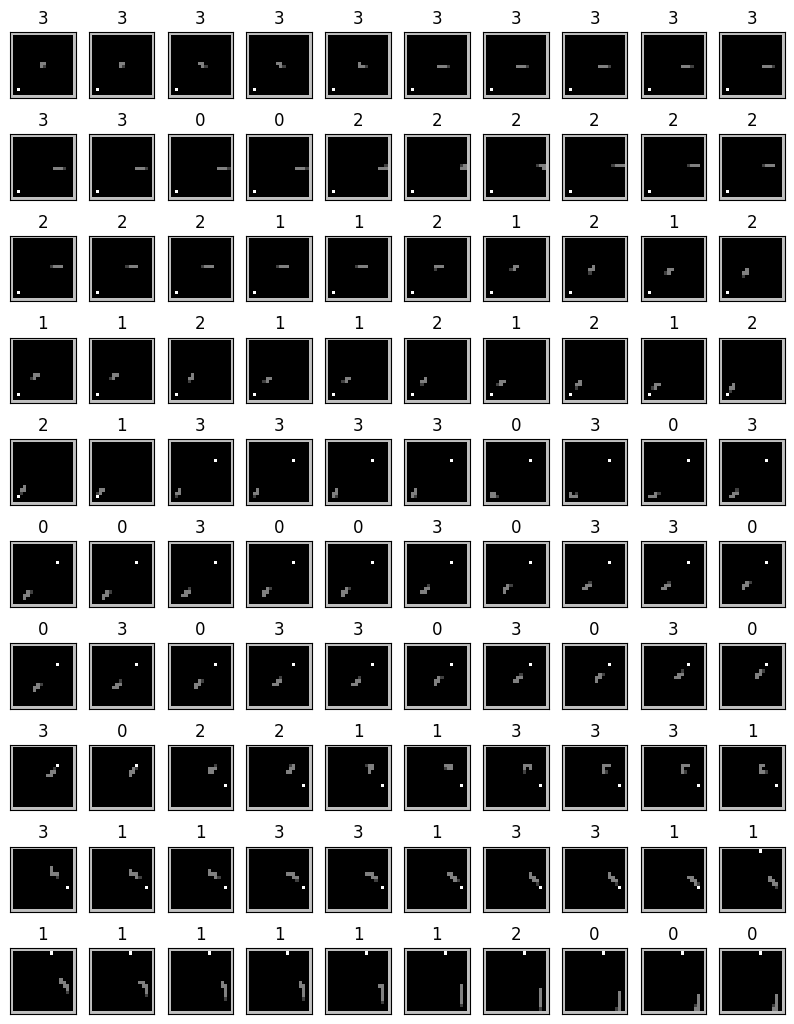

In [151]:

fig, axes = plt.subplots(nrows=10, ncols=10, figsize=(10, 13),
                         subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    x1 = x_train.iloc[i].values
    x1 = x1.reshape(20,20)
    ax.imshow(x1, cmap = 'gray')
    ax.set_title(y_train[i])

plt.show()

In [152]:
print(y_test)

11000    2
11001    2
11002    2
11003    2
11004    2
        ..
11995    2
11996    2
11997    2
11998    2
11999    2
Name: ans, Length: 1000, dtype: int64


In [153]:
print(y_train)

0        3
1        3
2        3
3        3
4        3
        ..
10995    2
10996    2
10997    2
10998    2
10999    2
Name: ans, Length: 11000, dtype: int64


In [154]:
print(x_train)

       px1  px2  px3  px4  px5  px6  px7  px8  px9  px10  ...  px391  px392  \
0        3    3    3    3    3    3    3    3    3     3  ...      3      3   
1        3    3    3    3    3    3    3    3    3     3  ...      3      3   
2        3    3    3    3    3    3    3    3    3     3  ...      3      3   
3        3    3    3    3    3    3    3    3    3     3  ...      3      3   
4        3    3    3    3    3    3    3    3    3     3  ...      3      3   
...    ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...    ...    ...   
10995    3    3    3    3    3    3    3    3    3     3  ...      3      3   
10996    3    3    3    3    3    3    3    3    3     3  ...      3      3   
10997    3    3    3    3    3    3    3    3    3     3  ...      3      3   
10998    3    3    3    3    3    3    3    3    3     3  ...      3      3   
10999    3    3    3    3    3    3    3    3    3     3  ...      3      3   

       px393  px394  px395  px396  px397  px398  px

In [155]:
#plt.imshow(x_train[0], cmap='gray')

x_train = x_train.astype('float32') / 4  # 벽, 빈공간, 머리, 몸통, 사과 0~4
y_train = to_categorical(y_train) # 상하좌우 벡터로
x_test = x_test.astype('float32') / 4  
y_test = to_categorical(y_test) 

In [175]:
model = Sequential([
    Dense(64, input_dim=20*20, activation='relu'), # 400 입력
    Dense(32, activation='relu'),
    Dense(4, activation='softmax') # 상하좌우
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
#model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])
# 이건 분류임?


checkpoint_callback = ModelCheckpoint("best_model.h5",
                                      save_best_only=True,
                                      monitor="val_loss")

In [176]:
hist = model.fit(x_train, y_train,
                 validation_split=0.2,
                 batch_size=32,
                 epochs=100,
                 callbacks=[checkpoint_callback])

Epoch 1/100
275/275 [==============================] - 2s 6ms/step - loss: 1.2921 - accuracy: 0.3815 - val_loss: 1.3312 - val_accuracy: 0.3605
Epoch 2/100
275/275 [==============================] - 1s 5ms/step - loss: 1.1896 - accuracy: 0.4593 - val_loss: 1.3508 - val_accuracy: 0.3591
Epoch 3/100
275/275 [==============================] - 1s 5ms/step - loss: 1.1030 - accuracy: 0.5114 - val_loss: 1.3483 - val_accuracy: 0.3764
Epoch 4/100
275/275 [==============================] - 1s 4ms/step - loss: 1.0334 - accuracy: 0.5518 - val_loss: 1.4198 - val_accuracy: 0.3864
Epoch 5/100
275/275 [==============================] - 1s 5ms/step - loss: 0.9699 - accuracy: 0.5768 - val_loss: 1.4597 - val_accuracy: 0.3677
Epoch 6/100
275/275 [==============================] - 1s 5ms/step - loss: 0.9228 - accuracy: 0.5987 - val_loss: 1.4675 - val_accuracy: 0.3436
Epoch 7/100
275/275 [==============================] - 1s 5ms/step - loss: 0.8691 - accuracy: 0.6177 - val_loss: 1.5927 - val_accuracy: 0.3514

In [177]:
test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)

y_pred = model.predict(x_test)
y_pred = y_pred.argmax(axis=-1)
np.savetxt('snake1_pred.csv', y_pred, fmt='%d')

32/32 [==============================] - 0s 2ms/step - loss: 4.5167 - accuracy: 0.3400
Test accuracy 0.3400000035762787
Test loss 4.5167059898376465
32/32 [==============================] - 0s 1ms/step


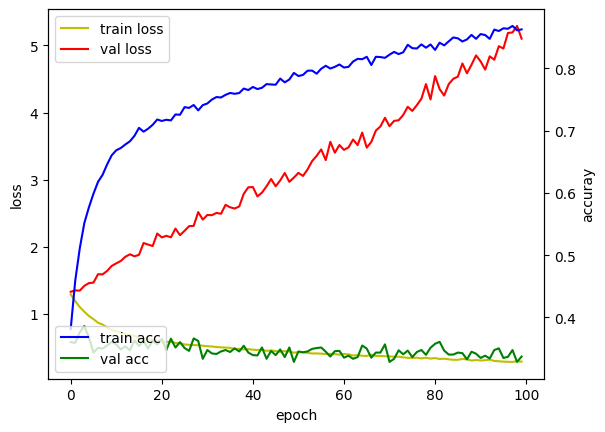

In [178]:
fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()